# Introducción

Cuando estamos trabajando con datos una decisión importante que debemos tomar es el de hacer uso de métodos paramétricos o no paramétricos. Los métodos estadísticos paramétricos son aquellos que se pueden usar cuando los datos tienen un función de distribución conocida, generalmente Gaussianna. Si nuestra muestra de datos no es Gaussianna, entonces las asunciones de los test paramétricos son incumplidas y debemos de hacer uso de los métodos no paramétricos.

Existen numerosas técnicas que podemos usar que podemos usar para chequear si nuestra muestra de datos se desvía de una distribución Gaussianna, estos son los conocidos test de normalidad.

# Asunción de Normalidad

Una gran parte de los campos de la estadística están pensados para cuando podemos asumir que nuestra muestra de datos es extraída de una distribución normal. Si los métodos usados asumen que la muestra es normal, pero nuestra muestra de datos no es normal, los resultados obtenidos puede ser engañosos o erróneos. Existen una serie de técnicas que nos permiten chequear si nuestra muestra es los suficiente normal como para poder hacer uso de las técnicas estándar, o lo suficientemente no normal para usar métodos estadísticos no paramétricos. También es posible hacer uso de técnicas de transformación de datos que hacen que nuestra muestra sea lo suficientemente normal.

A la hora de chequear si una muestra es o no normal existen dos técnicas fundamentales:

* **Métodos Gráficos:** son métodos para visualizar nuestros datos y evaluar de forma cualitativa como de normal son nuestros datos.

* **Test estadísticos:** son métodos que nos permiten calcular una probabilidad de como de normales son nuestros datos.

# Métodos Gráficos

Se pueden hacer uso de gráficos para chequear cuando estamos ante un conjunto de datos con una distribución normal. Esta forma de chequear es cualitativa y por lo tanto, es menos precisa que los test estadísticos.

## Histograma

Se trata de uno de los gráficos más simples y más usados para chequear la distribución de una muestra de datos. En un histograma los datos son agrupados en un número de grupos prefijados llamados bins o cajas. Los datos se clasifican en cada bin y se cuenta el número de observaciones que contiene cada bin. En el eje X se muestran los bins y en el eje y el número de muestras que contiene dicho bin. Si nuestra muestra es normal tendrá forma de campana.

La librería matplotlib dispone de la función **hist()** que nos permite generar un histograma. Por defecto el número de bins usado es de 10.

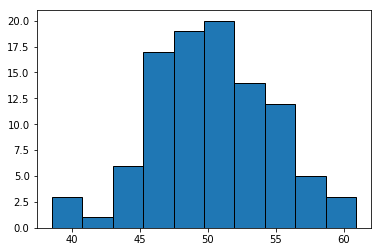

In [2]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

#Nos creamos el conjunto de datos
seed(1)
data = 5*randn(100) + 50

#Nos creamos nuestro histograma
plt.hist(data, ec = 'black')
plt.show()

## Quantile-Quantile Plot

Este gráfico genera su propia distribución idealizada para poder compararla con nuestra muestra real. La muestra ideal es dividida en grupos llamados cuantiles. Cada punto de nuestra muestra de datos es pareada con un componente similar de la distribución ideal. Los puntos resultantes son graficados mediante un gráfico de tipo scatter donde en el eje x mostramos su valor ideal y su valor real en el eje y. Un macheo perfecto debería mostrar un línea inclinada de 45 grados. Desviaciones de los puntos respecto la línea ideal nos muestra una desviación en la distribución respecto al valor real.

Python mediante la librería **statsmodels** dispone de la función **qqplot()**. Esta función toma como argumente la muestra de datos y de forma automática asume que se está comparando con una distribución Gaussianna. Podemos dibujar la línea estandarizada haciendo uso del valor **'s'** para el argumento **line**. 

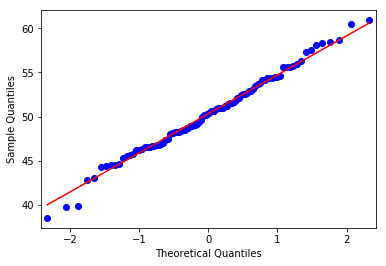

In [1]:
from numpy.random import seed, randn
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

#Fijamos la semilla
seed(1)

#Nos creamos el conjunto de datos
data = 5*randn(100) + 50

qqplot(data, line = 's')
plt.show()

# Test Estadísticos de Normalidad

Existen una gran cantidad de test que pueden ser usados para cuantificar cuando una muestra de datos es extraída de una distribución Gaussianna. Cada test hace diferentes asunciones y considera diferentes aspectos respecto a los datos.

## Interpretación de un Test

Antes de aplicar un test estadístico, debemos de saber la forma de interpretar los resultados. Un test al menos retorna dos valores numéricos:

* **Statistic**

* **p-value**

En los que respecta al estadístico cada test calcula un valor específico. Este estadístico puede ayudar en la interpretación del resultado, aunque esto requiere un conocimiento más profundo de estadística. Sin embargo, el p-valor puede ser usado rápidamente y interpretarse de forma precisa en aplicaciones prácticas. EL test asume que la muestra es una distribución Gaussianna. Técnicamente esta hipótesis es conocida como hipótesis nula H0. El nivel de umbral se le conoce como alpha, y típicamente toma el valor del 5% (0.05), que es usado para interpretar el p-valor. El test puede ser interpretado como sigue:

* **p-value <= alpha : ** resultado estadísticamente significativo, rechazamos las hipótesis nula.

* **p-value > alpha : ** resultado estadísticamente no significativo, no podemos rechazar la hipótesis nula.

El p-valor no debe interpretarse como la probabilidad de que los datos se ajusten a una distribución Gaussianna, se debe de ver como un valor que ayuda a interpretar el test estadístico.

## Shapiro-Wilk Test

El test de Shapiro-Wilk evalua una muestra y cuantifica como de probable es que los datos tengan una distribución Gaussianna. En la práctica se piensa que es una prueba fiable, aunque se sugiere que la prueba es más adecuada para muestras pequeñas, por ejemplo, miles de observaciones o menos.

La función **shapiro()** de la librería Scipy nos permite calcular el test de Shapiro para un conjunto de datos. Este test retorna dos valores el **W-Statistic** y el **p-value**.

In [1]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

#Fijamos la semilla
seed(1)

#Generamos una muestra Gaussianna de desviación 5 y media 50 
data = 5*randn(100) + 50

#Aplicamos el test de normalidad 
stat, p = shapiro(data)

print('W-Statistic : %.3f, p-value : %.3f' % (stat, p))

W-Statistic : 0.992, p-value : 0.822


En este caso si fijamos un alpha de 0.05 podemos ver como nuestro p-valor es superior a dicho valor, por lo tanto no podemos rechazar la hipótesis nula. Esto no implica que nuestra muestra sea Gaussianna, sino que existe un alta probabilidad de que nuestra muestra sea extraída de una distribución Gaussianna.

## D'Agostino's  K^2 Test

Este test calcula un resúmen estadístico de los datos, para ello calcula los parámetros de Kurtosis y de Skewness, para determinar si nuestra muestra proviene de una distribución Gaussianna. Skew se trata de una medida que cuantífica como de asimétrica es nuestra distribución, mientras que Kurtosis cuantifica la cantidad de observaciones que se acumulan en la cola de nuestra distribución.

Este test está disponible en la librería de Scipy a partir de la función **normaltest()**. Esta función retorna el estadśiticos, que en este caso es la suma al cuadrado de los parámetros de Kurtosis y Skewness, y el p-valor.

In [2]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

#Fijamos la semilla
seed(1)

#Generamos el conjunto de datos
data = 5*randn(100) + 50

#Aplicamos el test
stat, p = normaltest(data)

#Vemos los resultados
print('Statistic: %.3f, p-valor: %.3f' % (stat, p))

Statistic: 0.102, p-valor: 0.950


En este caso podemos un valor de estadístico reducida es decir tenemos índices de Skewness y Kurtosis reducidos, que es lo esperado para una distribución Gaussianna, además obtenemos un p-valor elevado lo que nos indica que existe una elevada probabilidad de que nuestra muestra de datos siga una distribución Gaussianna.

## Anderson-Darling Test

Se trata de un test estadístico que puede ser usado para evaluar si nuestra muestra de datos proviene de una de las muchas muestras de datos conocidas. Este puede ser usado para ver si una muestra de datos es Normal. Este test es una versión modificada de un test mucho más complejo conocido como test de Kolgomorov-Smirnov. La principal característica de este test es que retorna una lista de valores críticas con su p-valor asociada en lugar de un única p-valor.

La función **Anderson()** de la librería Scipy implementa dicho test. Como parámetros toma la muestra de datos y el tipo de distribución para realizar el test. Por defecto, el test toma como tipo de distribución una Gaussianna **(dist = 'norm')**.

In [12]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

#Fijamos la semilla
seed(1)

#Generamos el conjunto de datos
data = 5*randn(100) + 50

#Aplicamos el test
result = anderson(data)

dic_cri_pval = dict(zip(result.significance_level, result.critical_values))

print('Statistic : %.3f' % result.statistic)

for critical_value, p_valor in dic_cri_pval.items():
    print('significance_level : %.3f, critical_value:%.3f' % (critical_value, p_valor))

Statistic : 0.220
significance_level : 15.000, critical_value:0.555
significance_level : 10.000, critical_value:0.632
significance_level : 5.000, critical_value:0.759
significance_level : 2.500, critical_value:0.885
significance_level : 1.000, critical_value:1.053


Este test se interpreta comparando el estadístico con los valores críticos, de forma que si el estadístico es menor que los valores críticos, no podemos rechazar la hipótesis nula y por lo tanto existe una alta probabilidad de que nuestros provengan de una distribución normal.

## ¿Qué test se debería usar?

La recomendación es hacer uso de todos los test para un conjunto de datos. La pregunta es entonces ¿qué hacer si un test dice una cosa y otra test dice otra cosa? ¿Cómo interpretar este tipo de situaciones?

### Hard Fail

Nuestros datos podrían no ser normales por diferentes razones. Cada test examina la cuestión de normalidad desde una perspectiva ligeramente diferente. Si alguno de los test nos indica que es probable que no exista normalidad, entonces nuestros datos no son normales, tan simple como eso. Podríamos investigar el motivo por el cuál nuestros datos no son normales y tratar de aplicar técnicas para normalizar los datos. O bien debamos de comenzar a pensar en métodos no paramétricos en lugar de métodos paramétricos.

### Soft Fail 

Si alguno de los métodos indica que existe normalidad y otros indican lo contrario, podríamos tomarnos esto como existe cierta probabilidad de que nuestros provengan de una distribución Gaussianna. Por lo tanto, podemos seguir tratando los datos como si fuesen Gaussiannos y proceder con el uso de métodos paramétricos.